In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.datasets import make_spd_matrix

# Set matplotlib and seaborn plotting style
sns.set_style('darkgrid')
np.random.seed(42)

c:\python64\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


In [2]:
def RBF_kernel(a,b,sigma):
    return np.exp((-1/(2*sigma))*scipy.spatial.distance.cdist(a,b,'sqeuclidean'))

In [3]:
# Sample from the Gaussian process distribution
nb_of_samples = 41  # Number of points in each function
number_of_functions = 5  # Number of functions to sample
# Independent variable samples
X = np.expand_dims(np.linspace(-4, 4, nb_of_samples), 1)
sig = RBF_kernel(X, X,1)  # Kernel of data points

# Draw samples from the prior at our data points.
# Assume a mean of 0 for simplicity
ys = np.random.multivariate_normal(
    mean=np.zeros(nb_of_samples), cov=sig, 
    size=number_of_functions)

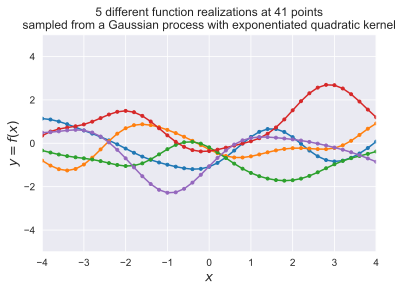

In [4]:
plt.figure(figsize=(6, 4))
for i in range(number_of_functions):
    plt.plot(X, ys[i], linestyle='-', marker='o', markersize=3)
plt.xlabel('$x$', fontsize=13)
plt.ylabel('$y = f(x)$', fontsize=13)
plt.title((
    '5 different function realizations at 41 points\n'
    'sampled from a Gaussian process with exponentiated quadratic kernel'))
plt.xlim([-4, 4])
plt.ylim([-5, 5])

plt.show()

In [25]:
def Gaussian_Process_Regressor(x1,y1,x2,kernel=RBF_kernel):
    sig11 = RBF_kernel(x1,x1,1)
    sig12 = RBF_kernel(x1,x2,1)
    sig22 = RBF_kernel(x2,x2,1)
    
    mu2 = (np.linalg.inv(sig11)@sig12).T@y1
    cov2 = sig22 - ((np.linalg.inv(sig11)@sig12).T @ sig12)
    return mu2,cov2

In [38]:
def data_generator(x):
    return (x*np.sin(1*x)).flatten()

In [146]:

num_of_train = 10
num_of_test  = 75
num_of_sample_function = 10 
domain = (-6, 6)

x1 = np.random.uniform(domain[0]+2, domain[1]-2, size=(num_of_train, 1))
y1 = data_generator(x1)
x2 = np.linspace(domain[0], domain[1], num_of_test).reshape(-1, 1)
mu2,cov2 = Gaussian_Process_Regressor(x1, y1, x2, RBF_kernel)
sig2 = np.sqrt(np.diag(cov2))

prior_sample = np.random.multivariate_normal(mean=np.zeros(num_of_test), cov=RBF_kernel(x2,x2,1), size=num_of_sample_function)
y2 = np.random.multivariate_normal(mean=mu2, cov=cov2, size=num_of_sample_function)

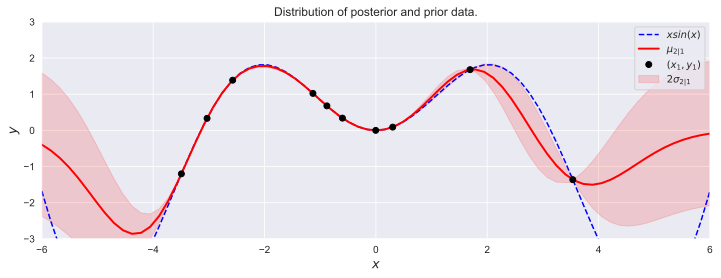

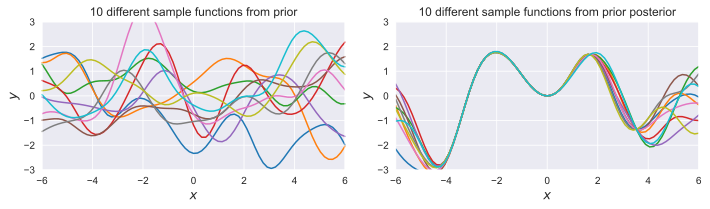

In [147]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

ax.plot(x2, data_generator(x2), 'b--', label='$xsin(x)$')
ax.fill_between(x2.flat, mu2-2*sig2, mu2+2*sig2, color='red',alpha=0.15, label='$2 \sigma_{2|1}$')
ax.plot(x2, mu2, 'r-', lw=2, label='$\mu_{2|1}$')
ax.plot(x1, y1, 'ko', linewidth=2, label='$(x_1, y_1)$')
ax.set_xlabel('$x$', fontsize=13)
ax.set_ylabel('$y$', fontsize=13)
ax.set_title('Distribution of posterior and prior data.')
ax.axis([domain[0], domain[1], -3, 3])
ax.legend()

fig2, ax2 = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

ax2[0].plot(x2, prior_sample.T, '-')
ax2[0].set_xlabel('$x$', fontsize=13)
ax2[0].set_ylabel('$y$', fontsize=13)
ax2[0].set_title(f'{num_of_sample_function} different sample functions from prior')
ax2[0].axis([domain[0], domain[1], -3, 3])
ax2[0].set_xlim([-6, 6])

ax2[1].plot(x2, y2.T, '-')
ax2[1].set_xlabel('$x$', fontsize=13)
ax2[1].set_ylabel('$y$', fontsize=13)
ax2[1].set_title(f'{num_of_sample_function} different sample functions from prior posterior')
ax2[1].axis([domain[0], domain[1], -3, 3])
ax2[1].set_xlim([-6, 6])
plt.tight_layout()
plt.show()